## Import các thư viện cần thiết ##


In [1]:
#Làm việc với dữ liệu
import pandas as pd
import numpy as np
from scipy import stats
import time
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Xử lý dữ liệu
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, RFE
#
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Học máy
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RandomizedSearchCV


# Loại bài toán phân loại
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


# pipeline
from sklearn.pipeline import Pipeline


# Đánh giá mô hình
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score, precision_score, recall_score, f1_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## Đọc dữ liệu ##

In [2]:
# đọc dữ liệu
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

pd.set_option('display.max_columns', None)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Xem thống kê mô tả ##

In [3]:
df.info()
df.describe()
df.describe(include=['object']) # thống kê mô tả cho các cột chứa dữ liệu kiểu string
df.describe(include=['number']) # thống kê mô tả cho các cột chứa dữ liệu kiểu số

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Nhận xét** 
  - 21 cột, 7043 dòng
  - 1 cột có kiểu dữ liệu Float, 2 cột có kiểu dữ liệu Int, 18 cột có dữ liệu kiểu Chuỗi
  - Cột TotalCharges có dữ liệu Float nhưng hiển thị là 'Object'


##### Đổi kiểu dữ liệu cho cột 'TotalCharges' #####

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

##### Bỏ qua cột 'CustomerID' và giá trị thiếu #####

In [5]:
df.dropna(inplace=True)

df.drop('customerID', axis=1, inplace=True)

##### Xem lại thống kê cho các cột số #####

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


##### Xem các giá trị duy nhất của từng cột có dữ liệu kiểu 'Object' #####

In [7]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


##### Kiểm tra giá trị thiếu #####

In [8]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##### Biểu đồ nhiệt (heatmap) cho giá trị thiếu #####

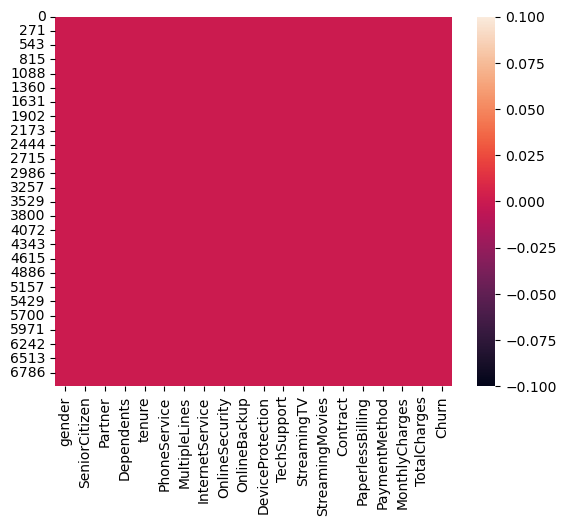

In [10]:
sns.heatmap(df.isnull())
plt.show()

**Kết luận: Không có giá trị thiếu (missing values)**

## Trực quan hóa dữ liệu ##

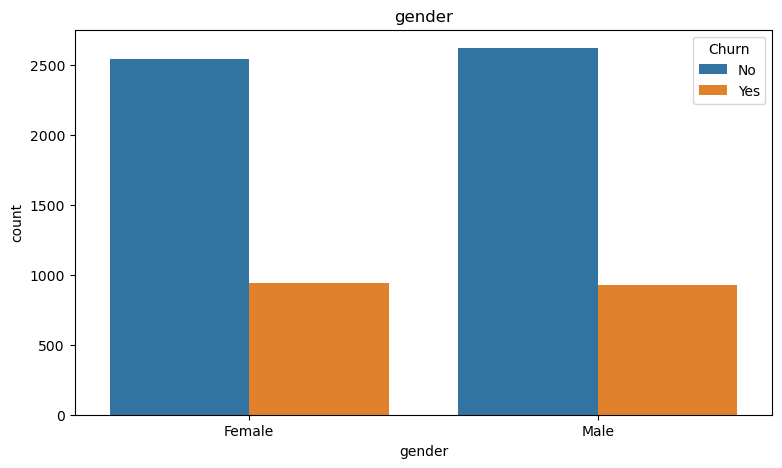

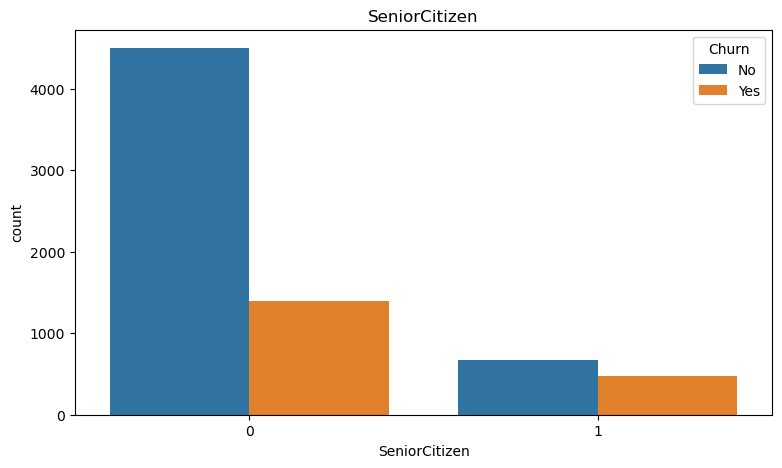

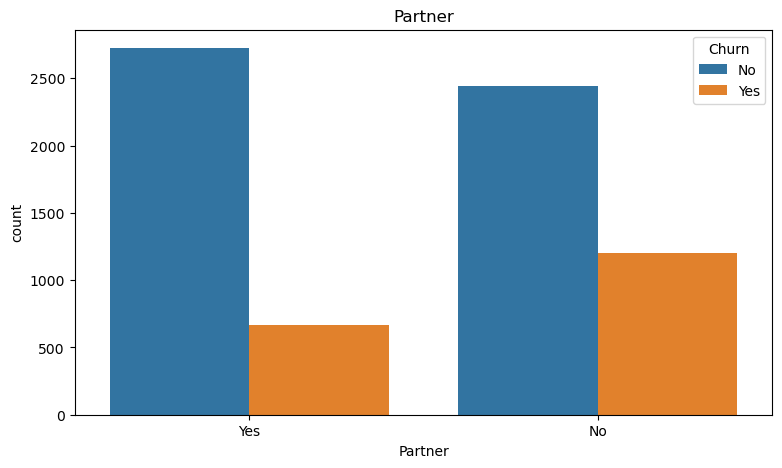

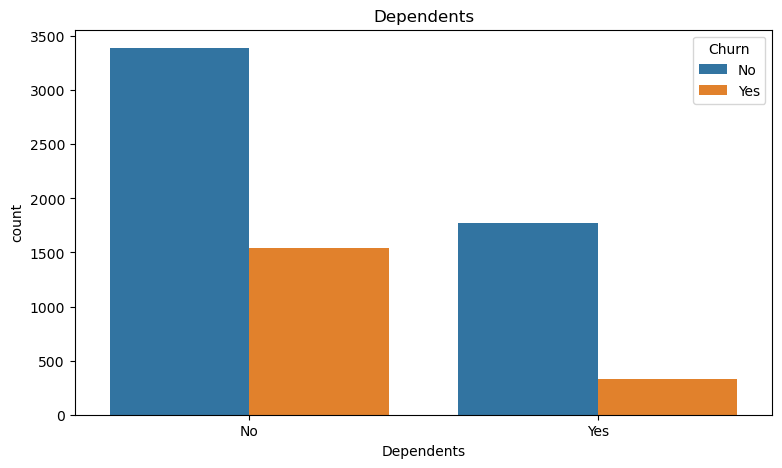

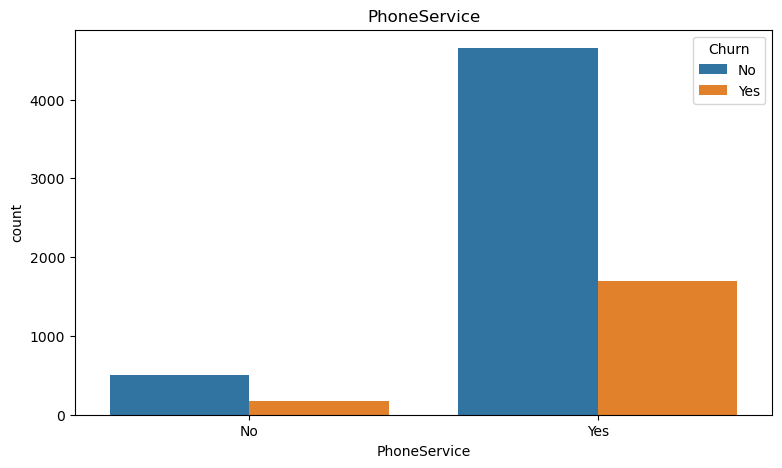

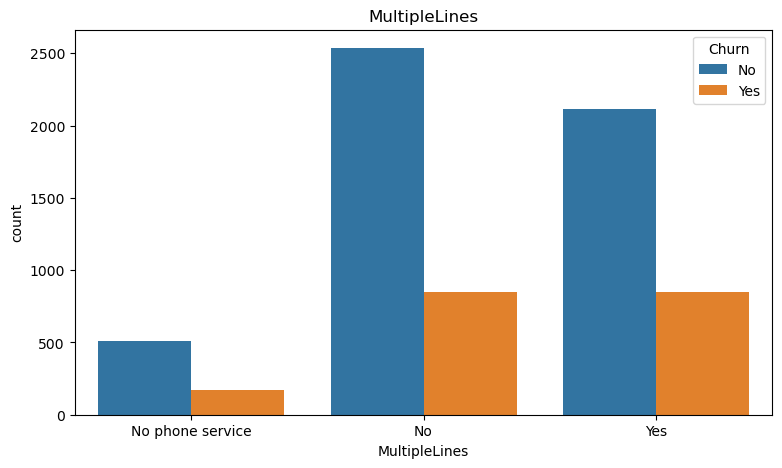

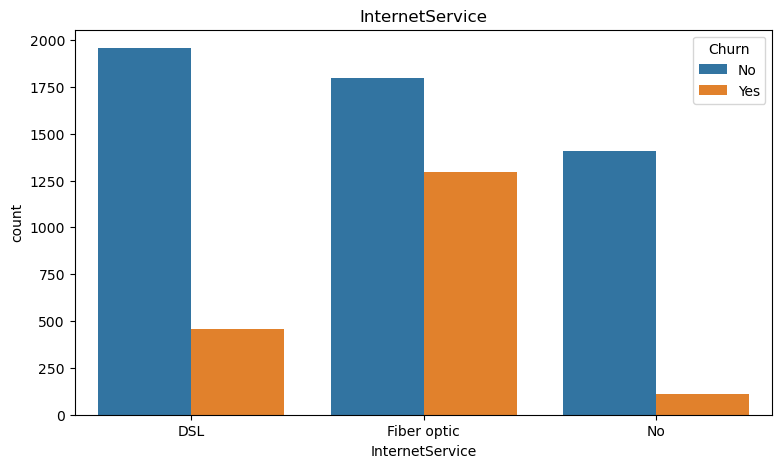

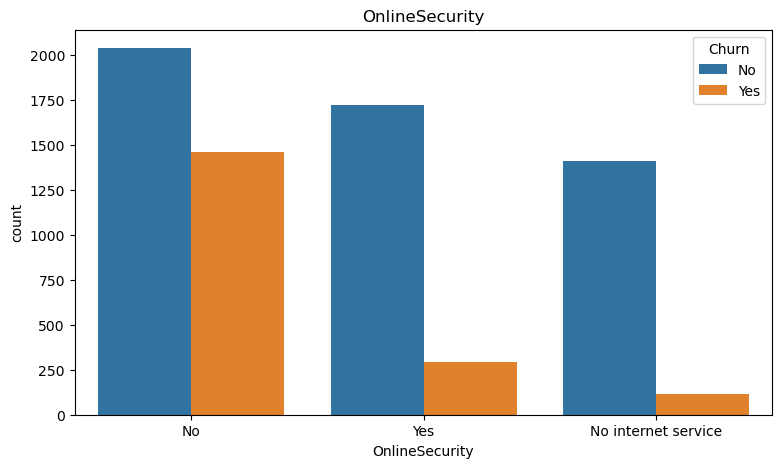

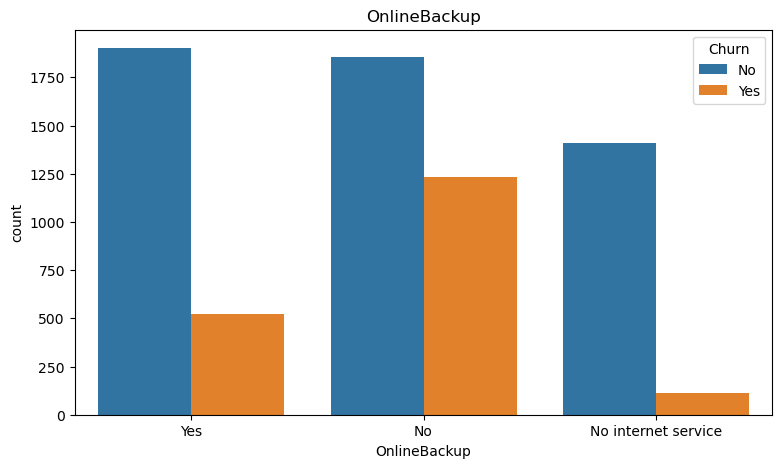

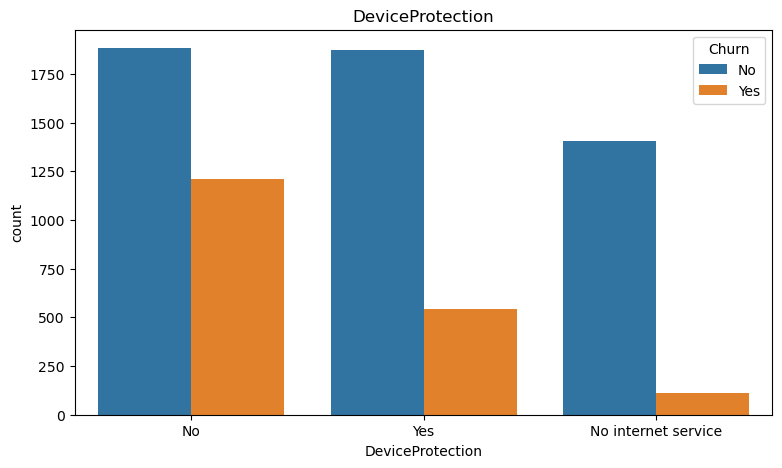

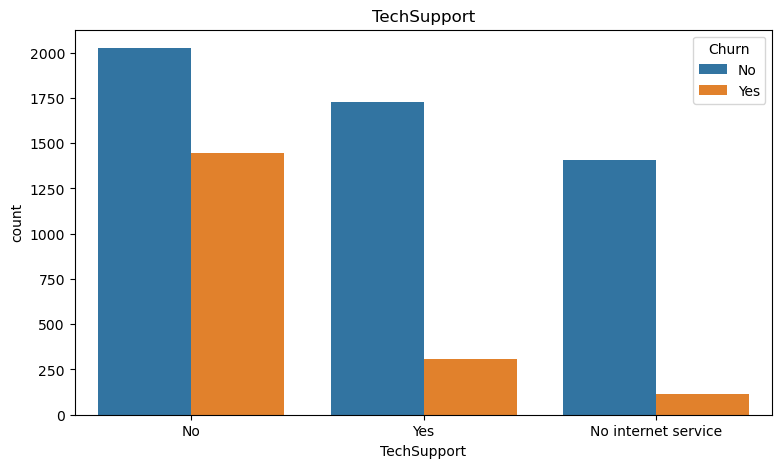

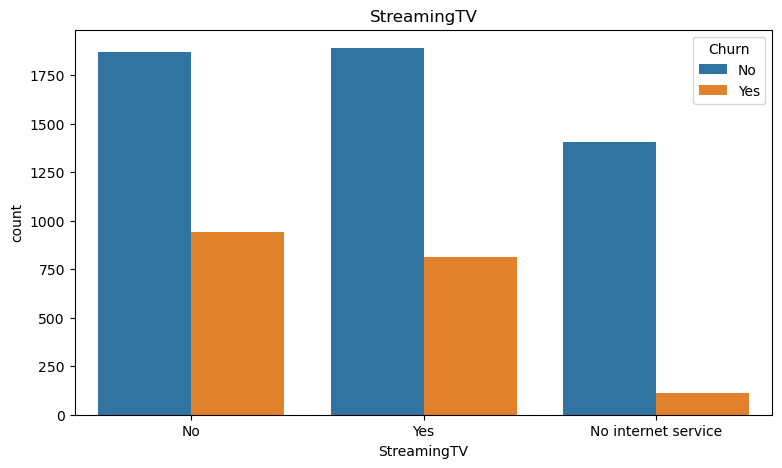

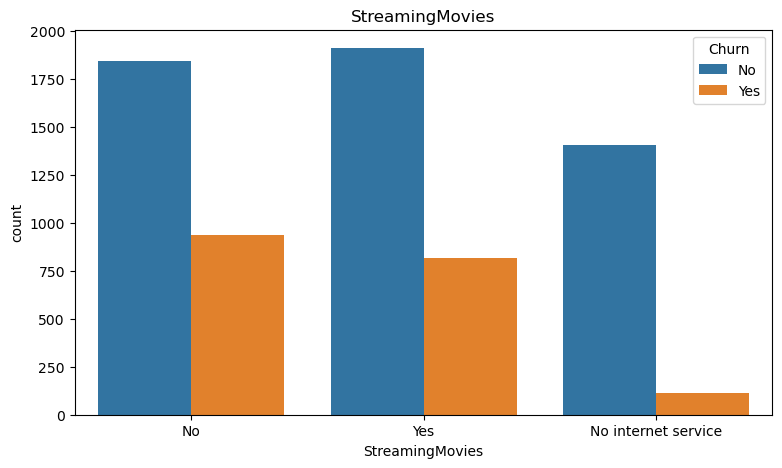

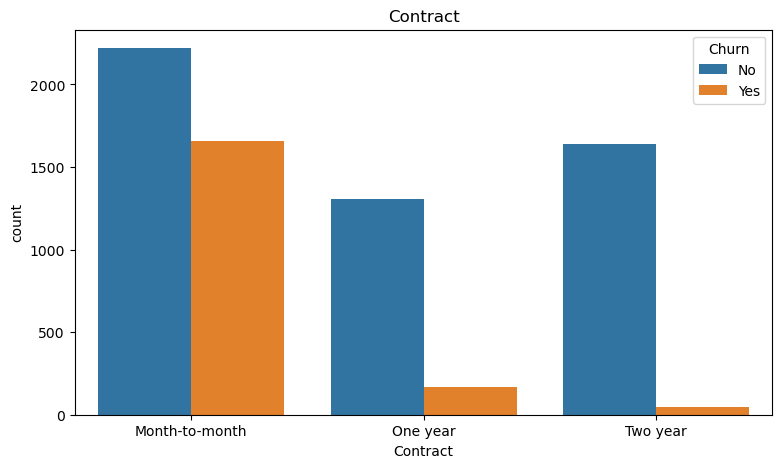

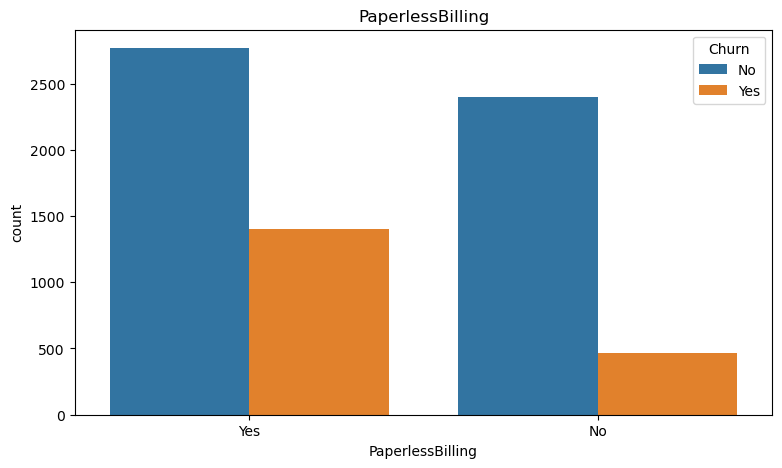

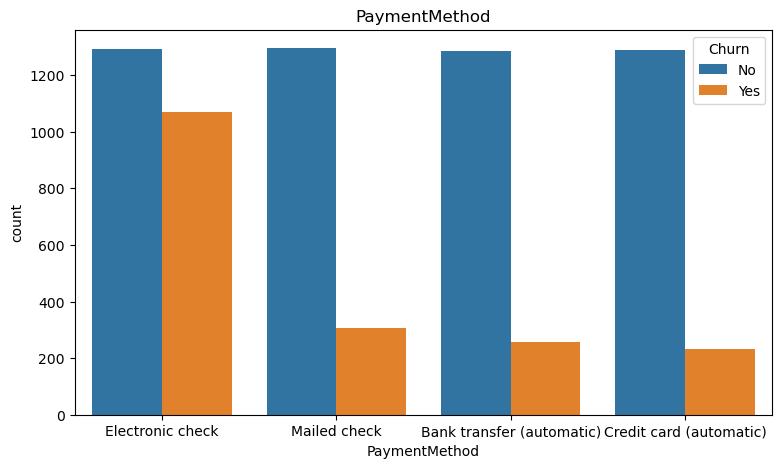

In [11]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(9, 5))
    sns.countplot(data=df, x=predictor, hue='Churn')
    plt.title(predictor)
    plt.show()

**Nhận xét**
  - Giới tính là như nhau ở trong việc ở lại hay rời bỏ, không mang ý nghĩa rõ ràng (gender)
  - Người già có xu hướng rời bỏ dịch vụ thấp hơn người trẻ (senior citizen)
  - Người có cộng sự (Partner) có xu hướng ở lại dịch vụ
  - Người sử dung dịch vụ Fiber optic có tỷ lệ rời bỏ cao hơn so với người sử dụng DSL; người không sử dụng dịch vụ Internet có xu hướng ở lại cao (InternetService)
  - Khách hàng có thời hạn hợp đồng cao thường có xu hướng ở lại (Contract)
  -  Khách hàng thanh toán bằng Electronic check có xu hướng rời bỏ cao hơn

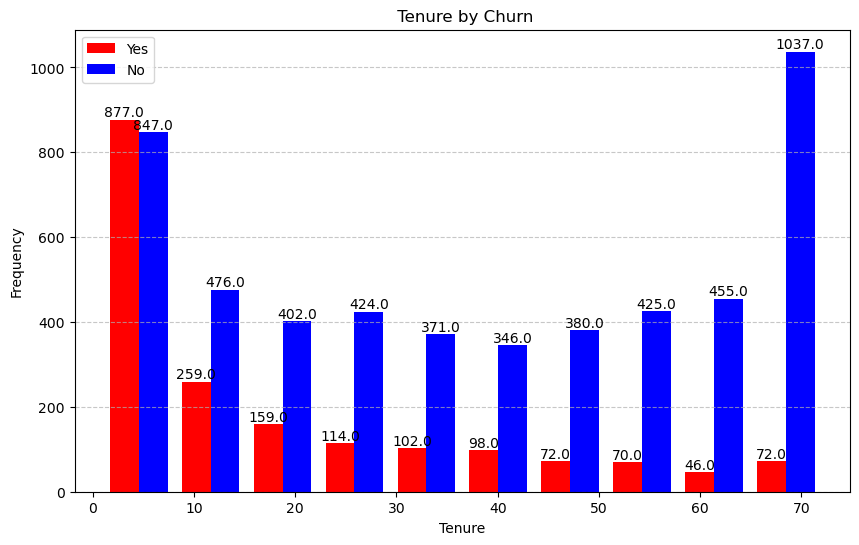

In [12]:
# Trực quan hóa dữ liệu cho cột 'tenure'
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')



**Nhận xét: Thời gian dùng càng ít, tỷ lệ rời bỏ dịch vụ càng cao**

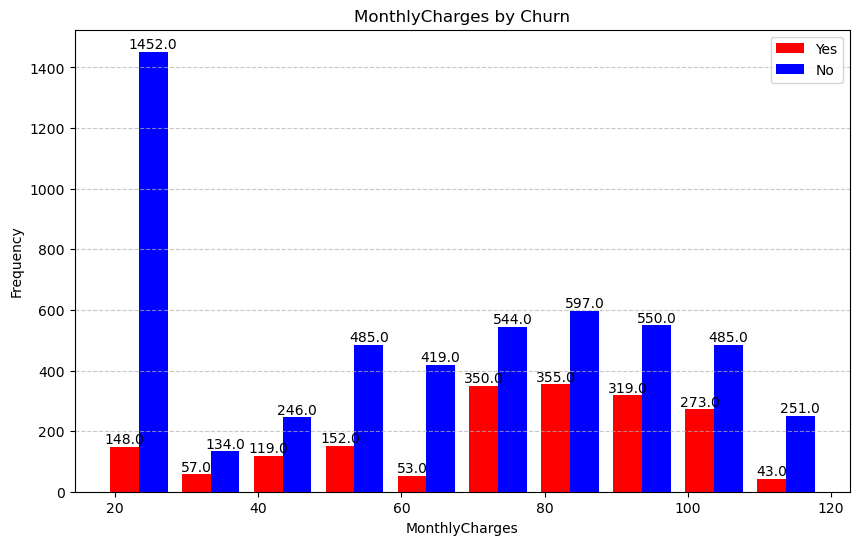

In [13]:
# Trực quan hóa dữ liệu cho cột 'MonthlyCharges'
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

**Nhận xét: Số tiền trả hàng tháng ít (20-40), tỉ lệ rời bỏ dịch vụ thấp**


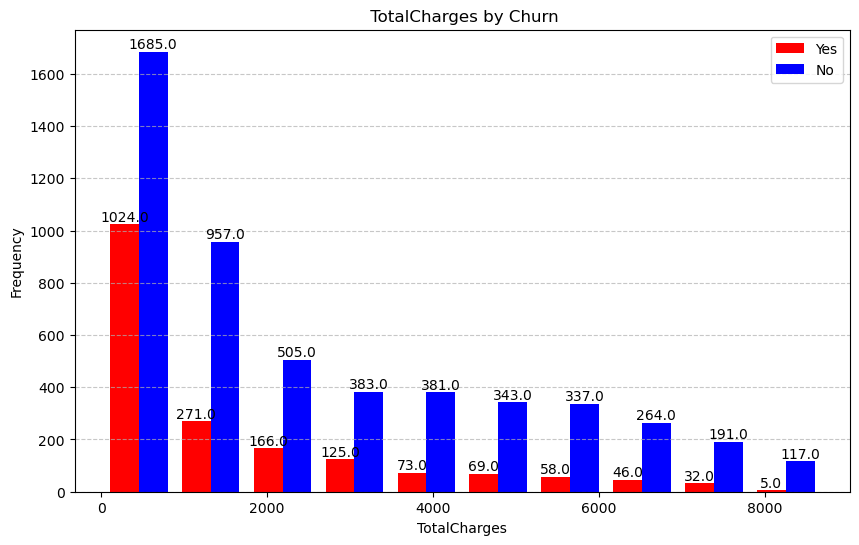

In [14]:
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

**Nhận xét: Tổng số tiền trả càng thấp, tỷ lệ rời bỏ càng cao**

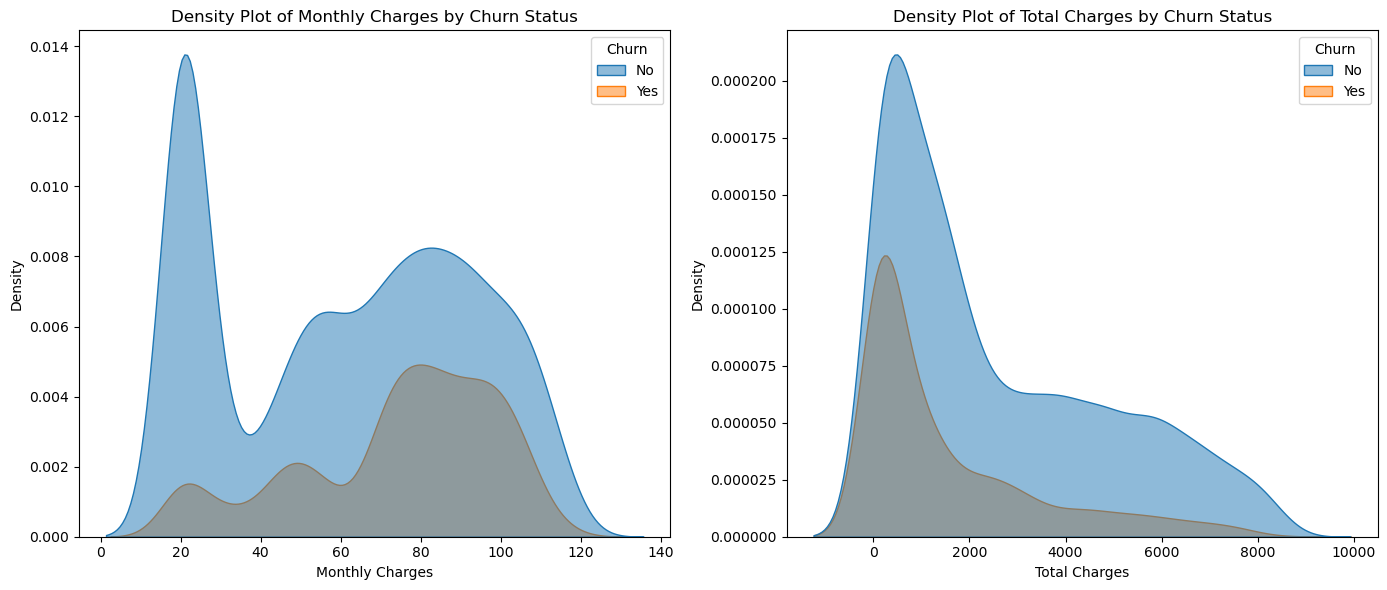

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status') # tạo biểu đồ mật độ cho cột 'TotalCharges' theo 'Churn'
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

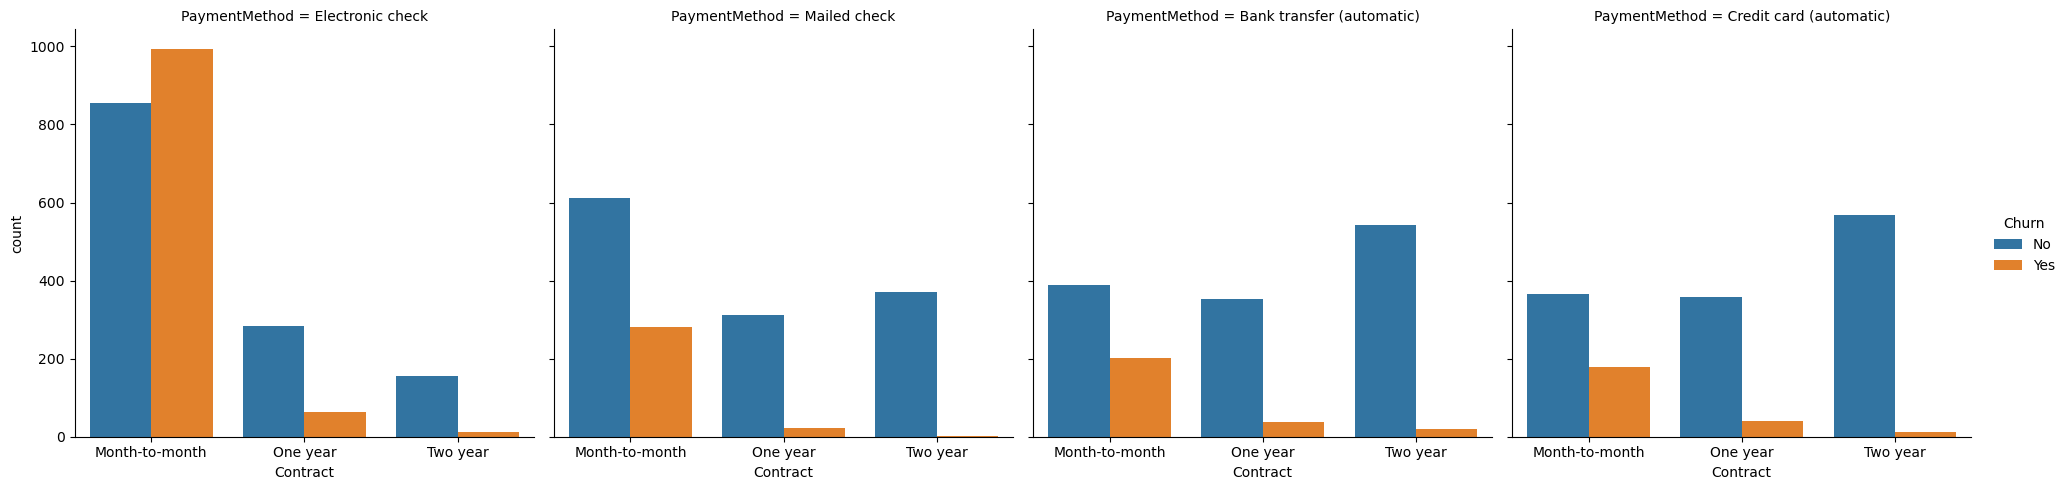

In [16]:
sns.catplot(x='Contract', hue='Churn', col='PaymentMethod', kind='count', data=df)
plt.show()

## Chia tập train/test ##

## Mã hóa và chuấn hóa dữ liệu ##

##### Mã hóa One hot cho dữ liệu #####

In [8]:
df_dummy = pd.get_dummies(df, dtype='int', drop_first=True)
df_dummy.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
1349,0,51,49.65,2553.35,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0
5440,0,19,49.60,962.90,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3342,0,40,62.05,2511.55,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0
5173,0,4,44.80,169.65,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3459,0,30,25.10,789.55,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0


##### Đổi tên cột Churn_Yes thành Churn #####

In [9]:
df_dummy.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
df_dummy.sample(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
3992,0,70,84.70,5991.05,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
1103,0,54,105.20,5637.85,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0
2177,1,72,102.65,7550.30,1,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0
6753,0,56,68.75,3815.40,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2907,0,20,89.00,1820.45,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1
3529,1,2,74.20,140.10,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
5563,0,4,20.15,84.50,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0
5766,0,23,60.00,1347.15,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
3716,0,11,102.00,1145.35,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1
1397,0,4,82.85,319.60,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0


##### Chuẩn hóa dữ liệu #####

In [11]:
X = df_dummy.drop(columns="Churn", axis=1)
y = df_dummy['Churn']
scale_cols = ['tenure', 'MonthlyCharges','TotalCharges']
X_scale = X.copy()
X_scale[scale_cols] = StandardScaler().fit_transform(X[scale_cols])

X_scale.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0.064303,-0.260878,-0.173740,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,-1.239504,-0.363923,-0.959649,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0.512486,-0.747850,-0.195248,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,-1.239504,0.196178,-0.940457,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
#print(X_train)

X_train: (5625, 30)
y_train: (5625,)


## Huấn luyện mô hình ##

##### Huấn luyện với các tham số mặc định #####

In [13]:
from scipy.stats import uniform, randint
model_scores = []

models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),  
    ('Support Vector Machine', SVC(random_state=42)), 
    ('Logistic Regression', LogisticRegression(random_state=42)),  
    ('K-Nearest Neighbors', KNeighborsClassifier()), 
    ('Decision Tree', DecisionTreeClassifier(random_state=42)), 
    ('Ada Boost', AdaBoostClassifier(random_state=42)),  
    ('Naive Bayes', GaussianNB())  
]


for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([  
        ('model', model)
    ])


    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test ,y_pred)
    f1 = f1_score(y_test , y_pred)

    model_scores.append({'Model': name,  'Recall': recall})

    scores_df = pd.DataFrame(model_scores)

    print("Model:", name)
    print("Precision", precision)
    print("Recall", recall)

    print()


Model: Random Forest
Precision 0.624561403508772
Recall 0.47593582887700536

Model: Gradient Boosting
Precision 0.6392857142857142
Recall 0.4786096256684492

Model: Support Vector Machine
Precision 0.6470588235294118
Recall 0.47058823529411764

Model: Logistic Regression
Precision 0.6193548387096774
Recall 0.5133689839572193

Model: K-Nearest Neighbors
Precision 0.5258855585831063
Recall 0.516042780748663

Model: Decision Tree
Precision 0.4839506172839506
Recall 0.5240641711229946

Model: Ada Boost
Precision 0.647887323943662
Recall 0.4919786096256685

Model: Naive Bayes
Precision 0.4287598944591029
Recall 0.8689839572192514



##### So sánh các mô hình mặc định #####

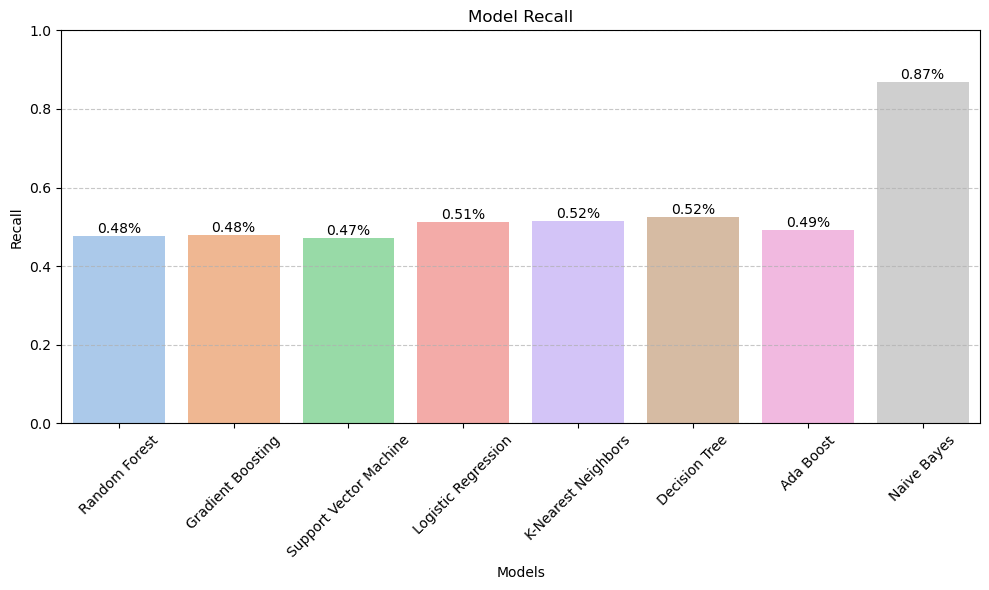

In [14]:
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Recall', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Recall')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Tinh chỉnh siêu tham số cho các mô hình #####

**Tính toán class_weight**

In [15]:
from sklearn.utils import class_weight
classes = np.unique(y) 

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y
)

class_weights_dict = dict(zip(classes, weights))
print(f"Dictionary trọng số lớp: {class_weights_dict}")


Dictionary trọng số lớp: {0: 0.6809994189424753, 1: 1.8812199036918138}


**Tinh chỉnh siêu tham số cùng với class_weight vừa tính**

In [16]:
from scipy.stats import uniform, randint


model_scores = []

# Create a list of models to evaluate
models_param = [
    ('Random Forest_params', RandomForestClassifier(random_state=42, class_weight=class_weights_dict),
        {'model__n_estimators': [50, 100, 150],
         'model__max_depth': [5, 10, 20],
         'model__min_samples_split': [2, 5, 10],
         'model__min_samples_leaf': [1, 3, 5]}),  
    ('Gradient Boosting_params', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 150],
         'model__learning_rate': [0.05, 0.1, 0.2],
         'model__max_depth': [3, 4, 5]}), 
    ('Support Vector Machine_params', SVC(random_state=42, class_weight=class_weights_dict),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto', 0.1],
         'model__kernel': ['rbf', 'linear']}), 
    ('Logistic Regression_params', LogisticRegression(random_state=42, class_weight=class_weights_dict),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2'],
         'model__solver': ['lbfgs'],}),  
    ('K-Nearest Neighbors_params', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7, 9],
         'model__weights': ['uniform', 'distance'],
         'model__p': [1, 2]  }),  
    ('Decision Tree_params', DecisionTreeClassifier(random_state=42, class_weight=class_weights_dict),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10],
         'model__criterion': ['gini', 'entropy'],
         'model__min_samples_leaf': [1, 3, 5]}),  
    ('Ada Boost_params', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5, 1.0]}),  
    ('XG Boost_params', XGBClassifier(random_state=42, class_weight = class_weights_dict),
        {'model__n_estimators': [50, 100, 150],
         'model__learning_rate': [0.05, 0.1, 0.5],
         'model__max_depth': [3, 5, 7],
        'model__min_child_weight': [1, 3],     
        'model__gamma': [0, 0.1, 0.2],         
        'model__subsample': [0.8, 1.0],        
        'model__colsample_bytree': [0.8, 1.0]}),  #
    ('Naive Bayes_params', GaussianNB(), {})  
]

# Iterate over the models and evaluate their performance
for name, model, param_grid in models_param:
    # Create a pipeline for each model
    pipeline = Pipeline([  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_
        best_params = grid_search.best_params_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test ,y_pred)
    f1 = f1_score(y_test , y_pred)

    model_scores.append({'Model': name,  'Recall': recall})
    
    scores_df = pd.DataFrame(model_scores)
    
   
    print("Model:", name)
    print('Precision:',precision)
    print("Recall", recall)
    print(f"Tham số tốt nhất cho mô hình {name}: {best_params} " )
   
    print()


Model: Random Forest_params
Precision: 0.5182341650671785
Recall 0.7219251336898396
Tham số tốt nhất cho mô hình Random Forest_params: {'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2, 'model__n_estimators': 100} 

Model: Gradient Boosting_params
Precision: 0.6527777777777778
Recall 0.5026737967914439
Tham số tốt nhất cho mô hình Gradient Boosting_params: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 100} 

Model: Support Vector Machine_params
Precision: 0.45007235890014474
Recall 0.8315508021390374
Tham số tốt nhất cho mô hình Support Vector Machine_params: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'} 

Model: Logistic Regression_params
Precision: 0.49498327759197325
Recall 0.7914438502673797
Tham số tốt nhất cho mô hình Logistic Regression_params: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'} 

Model: K-Nearest Neighbors_params
Precision: 0.5509641873278237
Recall 0.534759

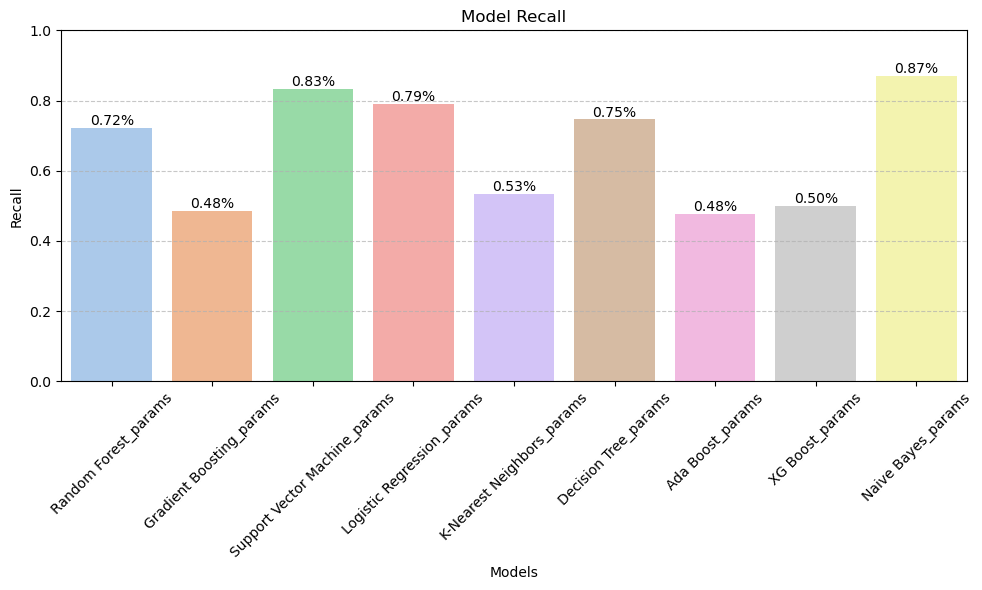

In [18]:
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Recall', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Recall')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Thiết lập siêu tham số cho các mô hình**  

In [52]:
LR = LogisticRegression(random_state=42, class_weight=class_weights_dict, C= 10, penalty= 'l2', solver= 'lbfgs')
RF = RandomForestClassifier(random_state=42, class_weight=class_weights_dict, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100)
GD = GradientBoostingClassifier(random_state=42, learning_rate = 0.05, max_depth = 4, n_estimators = 100)
SVM = SVC(random_state=42, class_weight=class_weights_dict, C = 0.1, gamma = 'scale', kernel = 'linear')
KN = KNeighborsClassifier(n_neighbors = 9, p = 1, weights = 'uniform')
DT = DecisionTreeClassifier(random_state=42, class_weight=class_weights_dict, criterion = 'entropy', max_depth = 10, min_samples_leaf = 5, min_samples_split = 2)
AB = AdaBoostClassifier(random_state=42, learning_rate = 1.0, n_estimators = 200)
XGB = XGBClassifier(model__colsample_bytree = 1, gamma = 0, learning_rate = 0.05, max_depth = 3, min_child_weight = 1, n_estimators = 150, subsample = 1)
NB = GaussianNB()
model_dict = [LR, RF, GD, SVM, KN, DT, AB, XGB, NB]

## Over Sampling ##

##### Áp dụng Smote lên tập train

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42, k_neighbors=5)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


##### Huấn luyện mô hình với tập train đã được Smote #####

In [54]:
model_score_smote = []

for model_item in model_dict:
    model_item.fit(X_train_smote, y_train_smote)
    y_pred = model_item.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test ,y_pred)
    model_score_smote.append({'Model': model_item,  'Recall': recall})
    print("Model:", model_item)
    print("Precision", precision)
    print("Recall", recall)
   
    print()
scores_smote_df = pd.DataFrame(model_score_smote)
scores_smote_df.head(10)

Model: LogisticRegression(C=10,
                   class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
                   random_state=42)
Precision 0.43031123139377536
Recall 0.8877005347593583

Model: RandomForestClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199036918138},
                       max_depth=10, min_samples_leaf=5, random_state=42)
Precision 0.43031123139377536
Recall 0.8823529411764706

Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=4, random_state=42)
Precision 0.43031123139377536
Recall 0.7406417112299465

Model: SVC(C=0.1, class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
    kernel='linear', random_state=42)
Precision 0.43031123139377536
Recall 0.8716577540106952

Model: KNeighborsClassifier(n_neighbors=9, p=1)
Precision 0.43031123139377536
Recall 0.7727272727272727

Model: DecisionTreeClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199

,Model,Recall
0,"LogisticRegression(C=10,\n c...",0.887701
1,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.882353
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.740642
3,"SVC(C=0.1, class_weight={0: 0.6809994189424753...",0.871658
4,"KNeighborsClassifier(n_neighbors=9, p=1)",0.772727
5,DecisionTreeClassifier(class_weight={0: 0.6809...,0.794118
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.759358
7,"XGBClassifier(base_score=None, booster=None, c...",0.754011
8,GaussianNB(),0.844920


## Under Sampling

##### Áp dụng ENN lên tập train

In [21]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3)
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)


##### Huấn luyện mô hình với tập train đã được Enn

In [22]:
model_score_enn = []
for model_item in model_dict:
    model_item.fit(X_train_enn, y_train_enn)
    y_pred = model_item.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test ,y_pred)
    model_score_enn.append({'Model': model_item,  'Recall': recall})
    print("Model:", model_item)
    print("Precision", precision)
    print("Recall", recall)
   
    print()
scores_enn_df = pd.DataFrame(model_score_enn)

Model: LogisticRegression(C=10,
                   class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
                   random_state=42)
Precision 0.4287598944591029
Recall 0.9117647058823529

Model: RandomForestClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199036918138},
                       max_depth=10, min_samples_leaf=5, random_state=42)
Precision 0.4287598944591029
Recall 0.8770053475935828

Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=4, random_state=42)
Precision 0.4287598944591029
Recall 0.8181818181818182

Model: SVC(C=0.1, class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
    kernel='linear', random_state=42)
Precision 0.4287598944591029
Recall 0.9090909090909091

Model: DecisionTreeClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199036918138},
                       criterion='entropy', max_depth=10, min_samples_leaf=5,
                   

## Kết hợp Smote và Enn

In [23]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

In [24]:
model_score_res = []
for model_item in model_dict:
    model_item.fit(X_train_res, y_train_res)
    y_pred = model_item.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test ,y_pred)
    model_score_smote.append({'Model': model_item,  'Recall': recall})
    print("Model:", model_item)
    print("Precision", precision)
    print("Recall", recall)
   
    print()
scores_res_df = pd.DataFrame(model_score_res)

Model: LogisticRegression(C=10,
                   class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
                   random_state=42)
Precision 0.4287598944591029
Recall 0.8957219251336899

Model: RandomForestClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199036918138},
                       max_depth=10, min_samples_leaf=5, random_state=42)
Precision 0.4287598944591029
Recall 0.8903743315508021

Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=4, random_state=42)
Precision 0.4287598944591029
Recall 0.8502673796791443

Model: SVC(C=0.1, class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
    kernel='linear', random_state=42)
Precision 0.4287598944591029
Recall 0.9251336898395722

Model: DecisionTreeClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199036918138},
                       criterion='entropy', max_depth=10, min_samples_leaf=5,
                   

## Feature Engineering

##### Xử lý cột Tenure #####

In [25]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_copy = df.copy()
df_copy['tenure'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)
df_tenure_group = pd.get_dummies(df_copy, dtype='int', drop_first=True)
df_tenure_group.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
X_tg = df_tenure_group.drop(columns=['Churn'])
y_tg = df_tenure_group['Churn']

In [26]:
df_tenure_group.head(1)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,tenure_13 - 24,tenure_25 - 36,tenure_37 - 48,tenure_49 - 60,tenure_61 - 72,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,29.85,29.85,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


##### Chuẩn hóa và chia tập train/test #####

In [56]:
scale_cols = ['MonthlyCharges','TotalCharges']
X_tg_scale = X_tg.copy()
X_tg_scale[scale_cols] = StandardScaler().fit_transform(X_tg[scale_cols])

X_tg_scale.head()
X_train_tg,X_test_tg,y_train_tg,y_test_tg = train_test_split(X_tg_scale, y_tg, test_size=0.2, random_state=42)
X_train_tg_res, y_train_tg_res= smote_enn.fit_resample(X_train_tg, y_train_tg)

print(f"X_train: {X_train_tg.shape}")
print(f"y_train: {y_train_tg.shape}")

X_train: (5625, 34)
y_train: (5625,)


##### Huấn luyện mô hình #####

In [59]:
model_score_tg = []
for model_item in model_dict:
    model_item.fit(X_train_tg_res, y_train_tg_res)
    y_pred_tg = model_item.predict(X_test_tg)
    accuracy = accuracy_score(y_test_tg, y_pred_tg)
    recall = recall_score(y_test_tg ,y_pred_tg)
    precision = precision_score(y_test_tg, y_pred_tg)
    model_score_tg.append({'Model': model_item,  'Recall': recall})
    print("Model:", model_item)
    print("Precison", precision)
    print("Recall", recall)
   
    print()
scores_tg_df = pd.DataFrame(model_score_tg)
scores_tg_df.head(10)

Model: LogisticRegression(C=10,
                   class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
                   random_state=42)
Precison 0.417910447761194
Recall 0.8983957219251337

Model: RandomForestClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199036918138},
                       max_depth=10, min_samples_leaf=5, random_state=42)
Precison 0.42663378545006164
Recall 0.9251336898395722

Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=4, random_state=42)
Precison 0.45161290322580644
Recall 0.8609625668449198

Model: SVC(C=0.1, class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
    kernel='linear', random_state=42)
Precison 0.4144893111638955
Recall 0.9331550802139037

Model: KNeighborsClassifier(n_neighbors=9, p=1)
Precison 0.411543287327478
Recall 0.8770053475935828

Model: DecisionTreeClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199036918138}

,Model,Recall
0,"LogisticRegression(C=10,\n c...",0.898396
1,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.925134
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.860963
3,"SVC(C=0.1, class_weight={0: 0.6809994189424753...",0.933155
4,"KNeighborsClassifier(n_neighbors=9, p=1)",0.877005
5,DecisionTreeClassifier(class_weight={0: 0.6809...,0.842246
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.887701
7,"XGBClassifier(base_score=None, booster=None, c...",0.877005
8,GaussianNB(),0.879679


#### Tìm kiếm các đặc trưng quan trọng ####

##### Permutation Importance #####

In [30]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import recall_score, make_scorer 

def calculate_permutation_importance(model, X, y, feature_names, scoring='recall', n_repeats=10):
    
    recall_scorer = make_scorer(recall_score, pos_label = 1)
    # Tính permutation importance
    result = permutation_importance(
        model,
        X,
        y,
        scoring=recall_scorer,
        n_repeats=n_repeats,
        random_state=42,
        n_jobs=-1
    )
    
    # Tạo DataFrame kết quả
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    
    perm_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance_mean': perm_importances,
        'Importance_std': perm_std
    })
    perm_importance_df = perm_importance_df.sort_values(by='Importance_mean', ascending=False)
    
    return perm_importance_df, result

models = {
    'Logistic Regression': LR,   
    'SVC': SVM,
    'Random Forest': RF,
    
}
feature_names = X_train_tg.columns
all_importance_results = {}
for model_name, model in models.items():
    print(f"\nTính Permutation Importance cho {model_name}...")
    importance_df, importance_result = calculate_permutation_importance(
            model, 
            X_train_tg,  
            y_train_tg,  
            feature_names,
            scoring='recall'
        )
        
    all_importance_results[model_name] = importance_df
        
    print(f"\nPermutation Importance cho {model_name} (dựa trên recall):")
    print(importance_df.head(15))  # Hiển thị 10 feature quan trọng nhất



Tính Permutation Importance cho Logistic Regression...

Permutation Importance cho Logistic Regression (dựa trên recall):
                           Feature  Importance_mean  Importance_std
14     InternetService_Fiber optic         0.212776        0.008662
29               Contract_Two year         0.109632        0.007956
10                  tenure_61 - 72         0.074515        0.006022
1                   MonthlyCharges         0.053043        0.008934
7                   tenure_25 - 36         0.021538        0.003612
9                   tenure_49 - 60         0.016522        0.003676
28               Contract_One year         0.015786        0.003810
8                   tenure_37 - 48         0.014247        0.004934
25                 StreamingTV_Yes         0.012977        0.004179
6                   tenure_13 - 24         0.009632        0.004093
27             StreamingMovies_Yes         0.007625        0.005294
2                     TotalCharges         0.005953        0.

##### Dựa trên mô hình RF #####

Độ quan trọng của đặc trưng (Random Forest):
                                  Feature  Importance
2                            TotalCharges    0.160619
29                      Contract_Two year    0.109649
14            InternetService_Fiber optic    0.082215
1                          MonthlyCharges    0.080152
10                         tenure_61 - 72    0.055850
17                     OnlineSecurity_Yes    0.053637
28                      Contract_One year    0.052608
32         PaymentMethod_Electronic check    0.048383
23                        TechSupport_Yes    0.039814
26    StreamingMovies_No internet service    0.028635
16     OnlineSecurity_No internet service    0.023544
22        TechSupport_No internet service    0.019409
20   DeviceProtection_No internet service    0.018626
30                   PaperlessBilling_Yes    0.018316
15                     InternetService_No    0.018142
5                          Dependents_Yes    0.016943
24        StreamingTV_No internet ser

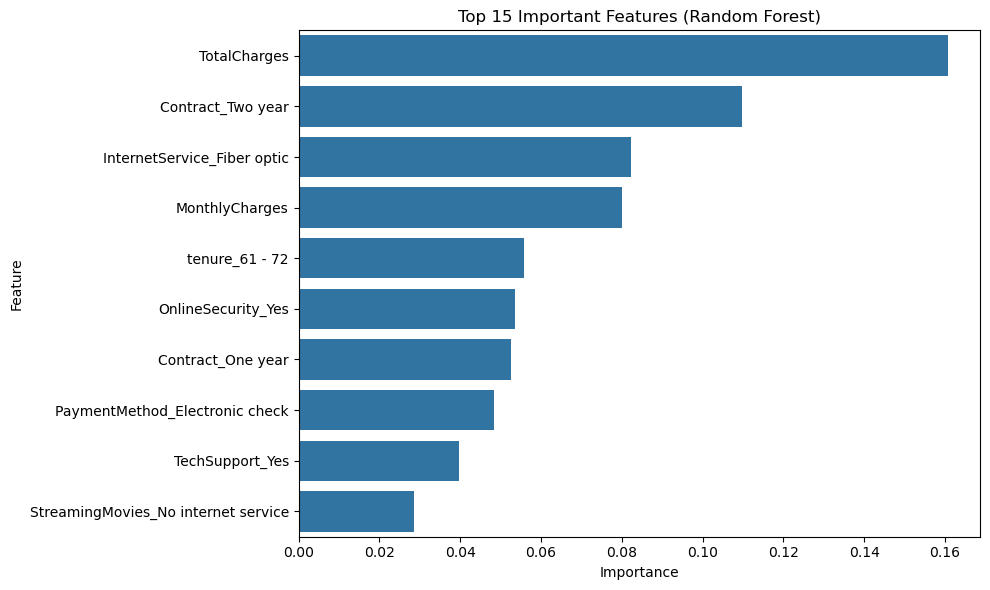

In [37]:
RF.fit(X_train_tg, y_train_tg)

# Lấy độ quan trọng của đặc trưng
importances = RF.feature_importances_
feature_names = X_train_tg.columns 

# Tạo DataFrame để dễ xem và sắp xếp
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Độ quan trọng của đặc trưng (Random Forest):")
print(feature_importance_df)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10)) # Hiển thị top 15
plt.title('Top 15 Important Features (Random Forest)')
plt.tight_layout()
plt.show()

##### Feature Selection #####

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_tg, y_tg)

mask = selector.get_support()
top_features = X_tg.columns[mask].tolist()
top_features

['MonthlyCharges',
 'TotalCharges',
 'tenure_61 - 72',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check']

##### Huấn luyện trên đặc trưng quan trọng #####

In [70]:
columns_to_keep = [
    'MonthlyCharges',
    'TotalCharges',
    'tenure_61 - 72',
    'InternetService_Fiber optic',
    'InternetService_No',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service'
]
columns_to_keep_2 = ['TotalCharges', 'Contract_Two year','InternetService_Fiber optic', 'MonthlyCharges' ,'tenure_61 - 72', 'OnlineSecurity_Yes',    
                    'Contract_One year', 'PaymentMethod_Electronic check', 'TechSupport_Yes', 'StreamingMovies_No internet service', 'OnlineSecurity_No internet service', 
                    'TechSupport_No internet service', 'DeviceProtection_No internet service', 'PaperlessBilling_Yes', 'InternetService_No']
X_new = X_tg[columns_to_keep]

In [39]:
X_new = X.copy()
X_new.drop(columns=['Dependents_Yes', 'MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], inplace=True)

In [71]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)
print(X_train_new.shape)
print(y_train_new.shape)
#from imblearn.combine import SMOTEENN

#smote_enn = SMOTEENN(random_state=42)
X_train_new_res, y_train_new_res = smote_enn.fit_resample(X_train_new, y_train_new)
model_score_res_new = []
for model_item in model_dict:
    model_item.fit(X_train_new_res, y_train_new_res)
    y_pred_new = model_item.predict(X_test_new)
    accuracy = accuracy_score(y_test_new, y_pred_new)
    recall = recall_score(y_test_new ,y_pred_new)
    model_score_res_new.append({'Model': model_item,  'Recall': recall})
    print("Model:", model_item)
    print("Precision", precision)
    print("Recall", recall)
   
    print()
scores_res_df = pd.DataFrame(model_score_res_new)
scores_res_df.head(10)

(5625, 10)
(5625,)
Model: LogisticRegression(C=10,
                   class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
                   random_state=42)
Precision 0.42396907216494845
Recall 0.8475935828877005

Model: RandomForestClassifier(class_weight={0: 0.6809994189424753,
                                     1: 1.8812199036918138},
                       max_depth=10, min_samples_leaf=5, random_state=42)
Precision 0.42396907216494845
Recall 0.8155080213903744

Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=4, random_state=42)
Precision 0.42396907216494845
Recall 0.7754010695187166

Model: SVC(C=0.1, class_weight={0: 0.6809994189424753, 1: 1.8812199036918138},
    kernel='linear', random_state=42)
Precision 0.42396907216494845
Recall 0.8502673796791443

Model: KNeighborsClassifier(n_neighbors=9, p=1)
Precision 0.42396907216494845
Recall 0.7486631016042781

Model: DecisionTreeClassifier(class_weight={0: 0.6809994189424753,
                              

,Model,Recall
0,"LogisticRegression(C=10,\n c...",0.847594
1,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.815508
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.775401
3,"SVC(C=0.1, class_weight={0: 0.6809994189424753...",0.850267
4,"KNeighborsClassifier(n_neighbors=9, p=1)",0.748663
5,DecisionTreeClassifier(class_weight={0: 0.6809...,0.783422
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.786096
7,"XGBClassifier(base_score=None, booster=None, c...",0.786096
8,GaussianNB(),0.885027
